<a href="https://colab.research.google.com/github/jinsyparker/Gemstone-Classification/blob/main/Gemstone_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from random import randint

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.models import Model, save_model

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score,precision_score, recall_score, roc_auc_score, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
import shutil

# Define the path to the "White Sapphire" directory
directory_to_remove = '/content/data/White Sapphire'  # Update with the correct path

try:
    # Attempt to remove the directory and its contents
    shutil.rmtree(directory_to_remove)
    print(f"The directory '{directory_to_remove}' and its contents have been removed.")
except FileNotFoundError:
    print(f"The directory '{directory_to_remove}' does not exist.")
except Exception as e:
    print(f"An error occurred while removing the directory: {str(e)}")


The directory '/content/data/White Sapphire' and its contents have been removed.


In [ ]:
import os

# Define the directory path
data_directory = '/content/data/Ametrine'  # Update with the correct path

# List all files in the directory
file_list = os.listdir(data_directory)

# Iterate through the files and remove those containing 'Pair' in their name
for file_name in file_list:
    if 'Pair' in file_name:
        file_path = os.path.join(data_directory, file_name)
        os.remove(file_path)

print("Images containing 'Pair' in their name have been removed.")


Images containing 'Pair' in their name have been removed.


Image at data/Emerald/Emerald 8X6 MM - 1.22 carats.png is not of the correct shape after resizing and cropping.


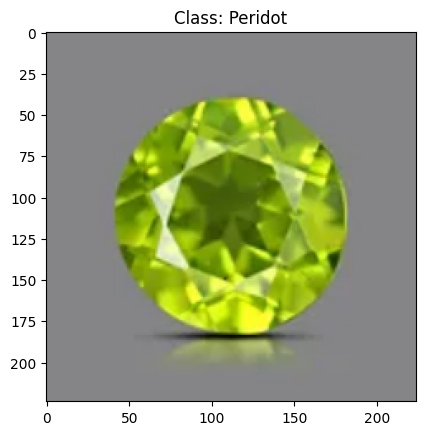

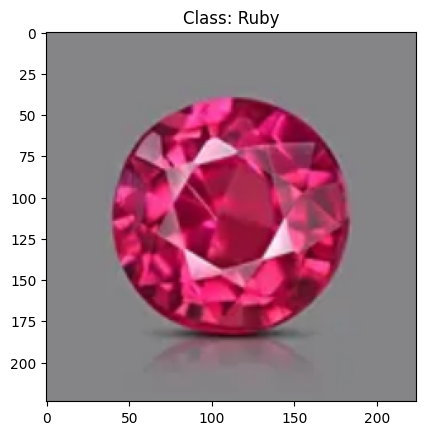

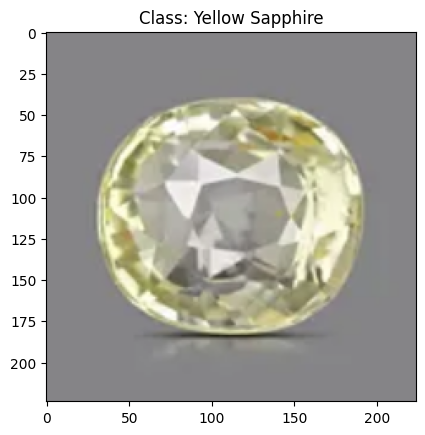

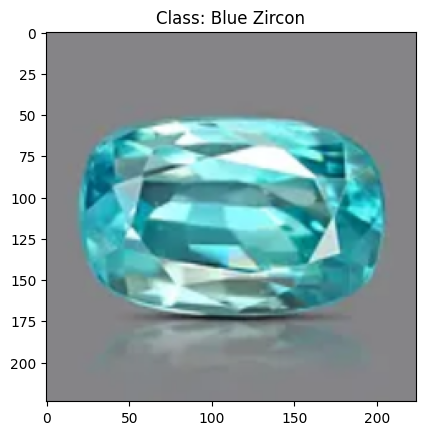

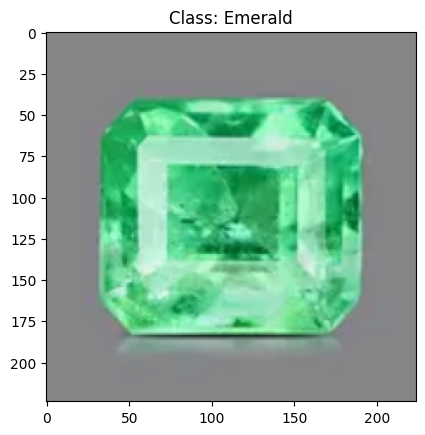

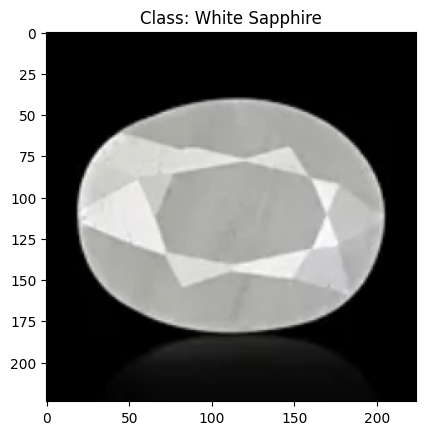

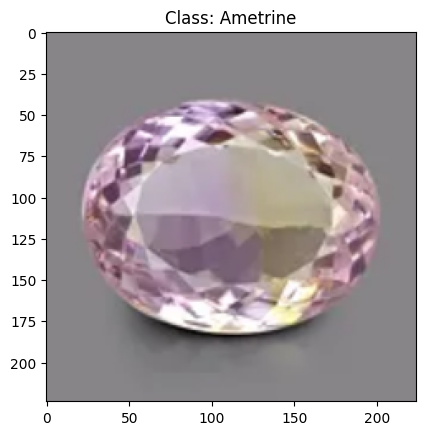

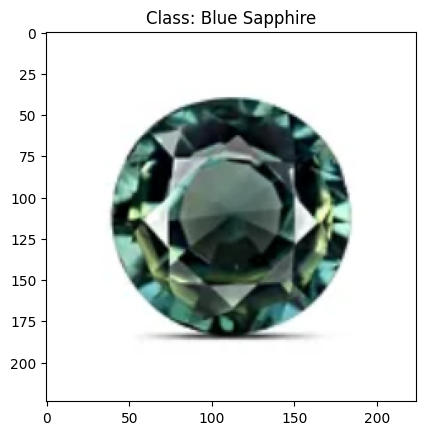

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define your classes directly
Name = ["Ruby", "Blue Sapphire", "Yellow Sapphire", "Emerald", "Ametrine", "Blue Zircon", "Peridot", "White Sapphire"]

# Create a mapping from gem names to integers and vice versa
gems_map = dict(zip(Name, range(len(Name))))
r_gems_map = {v: k for k, v in gems_map.items()}

def read_images(directory='data'):
    Images, Labels = [], []
    class_images = {}  # Dictionary to store one image per class
    for root, dirs, files in os.walk(directory):
        class_name = os.path.basename(root)  # get class name
        if class_name in Name:  # Check if the directory is one of the classes
            for file in files:
                try:
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path)  # read the image (OpenCV)

                    # Resize while maintaining aspect ratio
                    h, w = image.shape[:2]
                    scale = 224.0 / min(h, w)
                    new_h, new_w = int(h * scale), int(w * scale)
                    image = cv2.resize(image, (new_w, new_h))

                    # Crop to 224x224
                    startx = new_w//2 - 112
                    starty = new_h//2 - 112
                    image = image[starty:starty+224, startx:startx+224]

                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
                    if image.shape == (224, 224, 3):
                        Images.append(image)
                        Labels.append(gems_map[class_name])  # Append the class index instead of name
                        if class_name not in class_images:
                            class_images[class_name] = image  # Store one image per class
                    else:
                        print(f"Image at {image_path} is not of the correct shape after resizing and cropping.")
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")
            else:
                if class_name and class_name not in Name:
                    print(f"Directory {class_name} does not match any class name")
    return np.array(Images), np.array(Labels), class_images

# Read the images, labels, and one image per class
images, labels, class_images = read_images()

# Visualize one image from each class
for class_name, image in class_images.items():
    plt.figure()
    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.show()


In [ ]:
one_hot_labels = to_categorical(labels, num_classes=len(Name))

# Check if the labeling is correct after one-hot encoding
import random

# Select 10 random indices from the dataset
random_indices = random.sample(range(len(labels)), 10)

# Check if the labeling is correct after one-hot encoding for these random samples
for i in random_indices:
    original_label = Name[labels[i]]
    encoded_label = one_hot_labels[i]
    print(f"Original Label: {original_label}, One-Hot Encoded Label: {encoded_label}")

X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Define batch size
batch_size = 32


Original Label: White Sapphire, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 0. 1.]
Original Label: Peridot, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 1. 0.]
Original Label: White Sapphire, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 0. 1.]
Original Label: White Sapphire, One-Hot Encoded Label: [0. 0. 0. 0. 0. 0. 0. 1.]
Original Label: Blue Sapphire, One-Hot Encoded Label: [0. 1. 0. 0. 0. 0. 0. 0.]
Original Label: Emerald, One-Hot Encoded Label: [0. 0. 0. 1. 0. 0. 0. 0.]
Original Label: Emerald, One-Hot Encoded Label: [0. 0. 0. 1. 0. 0. 0. 0.]
Original Label: Blue Sapphire, One-Hot Encoded Label: [0. 1. 0. 0. 0. 0. 0. 0.]
Original Label: Yellow Sapphire, One-Hot Encoded Label: [0. 0. 1. 0. 0. 0. 0. 0.]
Original Label: Ruby, One-Hot Encoded Label: [1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np

# Calculate the number of images per class in the training set
train_class_counts = np.sum(y_train, axis=0)

# Calculate the number of images per class in the test set
test_class_counts = np.sum(y_test, axis=0)

# Print the counts for each class
for class_idx, class_name in enumerate(Name):
    print(f"Class: {class_name}")
    print(f"Training Set Count: {train_class_counts[class_idx]}")
    print(f"Test Set Count: {test_class_counts[class_idx]}")
    print()


Class: Ruby
Training Set Count: 361.0
Test Set Count: 83.0

Class: Blue Sapphire
Training Set Count: 311.0
Test Set Count: 85.0

Class: Yellow Sapphire
Training Set Count: 354.0
Test Set Count: 88.0

Class: Emerald
Training Set Count: 359.0
Test Set Count: 87.0

Class: Ametrine
Training Set Count: 213.0
Test Set Count: 49.0

Class: Blue Zircon
Training Set Count: 199.0
Test Set Count: 47.0

Class: Peridot
Training Set Count: 358.0
Test Set Count: 122.0

Class: White Sapphire
Training Set Count: 390.0
Test Set Count: 76.0



51877672/51877672 [==============================] - 3s 0us/step
Epoch 1/5
80/80 [==============================] - 630s 8s/step - loss: 2.8375 - accuracy: 0.8660 - val_loss: 0.4833 - val_accuracy: 0.9733
Epoch 2/5
80/80 [==============================] - 629s 8s/step - loss: 0.3889 - accuracy: 0.9642 - val_loss: 0.2559 - val_accuracy: 0.9796
Epoch 3/5
80/80 [==============================] - 589s 7s/step - loss: 0.1311 - accuracy: 0.9756 - val_loss: 0.2684 - val_accuracy: 0.9827
Epoch 4/5
80/80 [==============================] - 613s 8s/step - loss: 0.1565 - accuracy: 0.9764 - val_loss: 0.2156 - val_accuracy: 0.9796
Epoch 5/5
20/20 [==============================] - 122s 6s/step
Class: Ruby, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Class: Blue Sapphire, Precision: 1.0, Recall: 0.9270833333333334, F1-Score: 0.9621621621621621
Class: Yellow Sapphire, Precision: 0.9090909090909091, Recall: 0.9859154929577465, F1-Score: 0.9459459459459459
Class: Emerald, Precision: 1.0, Recall: 0.98, F1

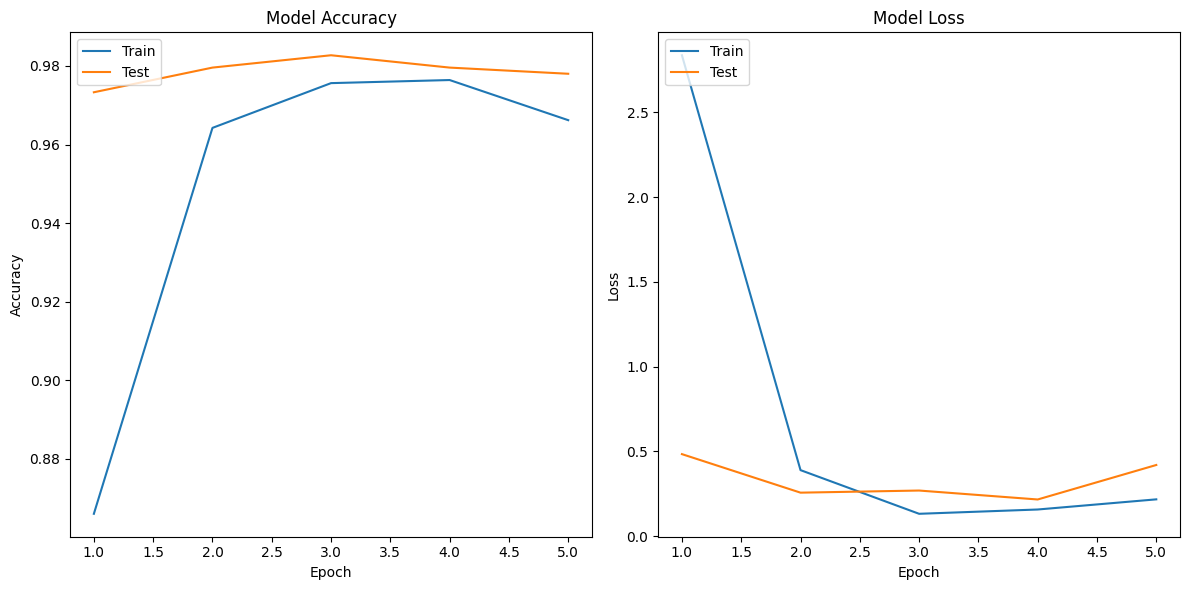

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Create the base model (DenseNet169) with pre-trained weights
base_model = DenseNet169(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(len(Name), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, F1-score, and recall
report = classification_report(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    target_names=Name,
    labels=np.arange(len(Name)),
    output_dict=True
)

# Print the classification report
for gem_class in Name:
    precision = report[gem_class]['precision']
    recall = report[gem_class]['recall']
    f1_score = report[gem_class]['f1-score']
    print(f"Class: {gem_class}, Precision: {precision}, Recall: {recall}, F1-Score: {f1_score}")

# Calculate overall accuracy, precision, recall, and F1 score
overall_accuracy = report['accuracy']
overall_precision = np.mean([report[gem_class]['precision'] for gem_class in Name])
overall_recall = np.mean([report[gem_class]['recall'] for gem_class in Name])
overall_f1_score = np.mean([report[gem_class]['f1-score'] for gem_class in Name])

print(f"Overall Accuracy: {overall_accuracy}")
print(f"Overall Precision: {overall_precision}")
print(f"Overall Recall: {overall_recall}")
print(f"Overall F1-Score: {overall_f1_score}")

# Generate plots of accuracy and loss with each epoch
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

Epoch 1/5
80/80 [==============================] - 407s 5s/step - loss: 1.0956 - accuracy: 0.8381 - val_loss: 0.0711 - val_accuracy: 0.9843
Epoch 2/5
80/80 [==============================] - 384s 5s/step - loss: 0.0724 - accuracy: 0.9792 - val_loss: 0.0820 - val_accuracy: 0.9717
Epoch 3/5
80/80 [==============================] - 392s 5s/step - loss: 0.0747 - accuracy: 0.9807 - val_loss: 0.0497 - val_accuracy: 0.9843
Epoch 4/5
80/80 [==============================] - 385s 5s/step - loss: 0.0586 - accuracy: 0.9839 - val_loss: 0.0799 - val_accuracy: 0.9827
Epoch 5/5
20/20 [==============================] - 76s 4s/step
Overall Accuracy: 0.9701726844583988, Precision: 0.9709212232128109, Recall: 0.9701726844583988, F1-Score: 0.9698813827872461
Class: Ruby, Precision: 0.9651162790697675, Recall: 1.0, F1-Score: 0.9822485207100593
Class: Blue Sapphire, Precision: 0.9651162790697675, Recall: 0.9764705882352941, F1-Score: 0.9707602339181286
Class: Yellow Sapphire, Precision: 0.9770114942528736, 

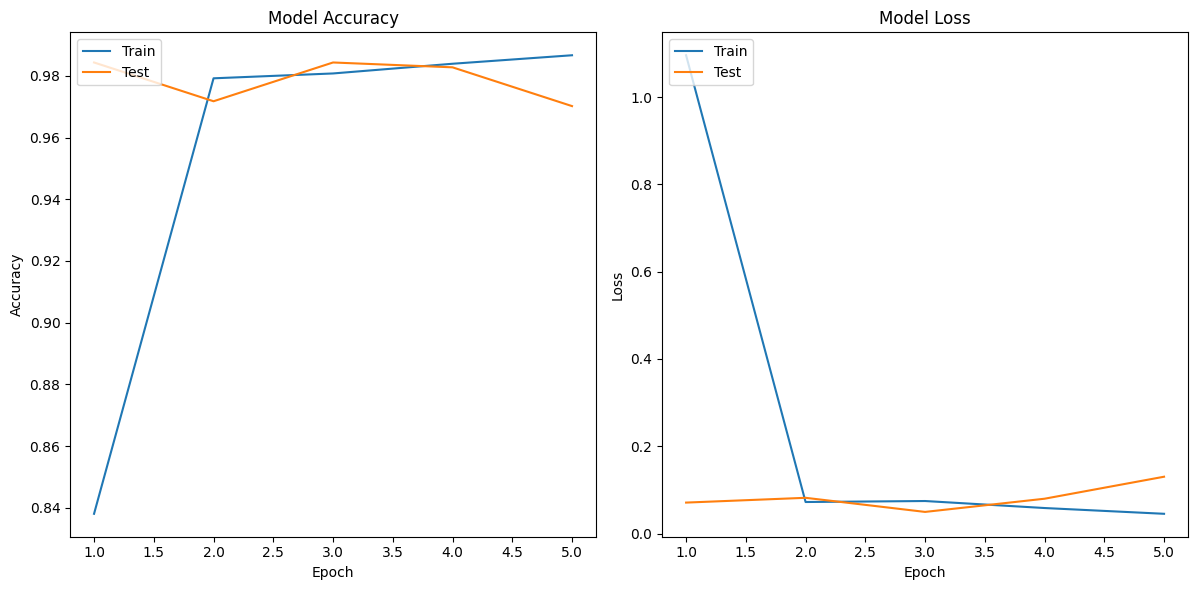

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Create the base model (ResNet50) with pre-trained weights
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(len(Name), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Change the number of epochs as needed
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

recall = recall_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

f1score = f1_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

# Calculate overall accuracy
accuracy = np.sum(y_pred_labels == np.argmax(y_test, axis=1)) / len(y_test)

print(f"Overall Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1score}")

# Calculate and print class-wise metrics
report = classification_report(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    target_names=Name,
    labels=np.arange(len(Name)),
    output_dict=True
)

for gem_class in Name:
    precision = report[gem_class]['precision']
    recall = report[gem_class]['recall']
    f1 = report[gem_class]['f1-score']
    print(f"Class: {gem_class}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Confusion Matrix

# Generate plots of accuracy, loss, and confusion matrix
plt.figure(figsize=(18, 6))

# Plot training & validation accuracy values
plt.subplot(1, 3, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot Confusion Matrix

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define the target input shape for MobileNet
input_shape = (224, 224, 3)

# Initialize empty arrays for preprocessed data
X_train_processed = np.empty((len(X_train), *input_shape))
X_test_processed = np.empty((len(X_test), *input_shape))

# Preprocess the training data
for i, img in enumerate(X_train):
    # Resize the image to the target input shape
    img = cv2.resize(img, (input_shape[0], input_shape[1]))
    # Convert the image to an array
    img_array = img_to_array(img)
    # Preprocess the image (rescaling and normalization)
    img_processed = preprocess_input(img_array)
    X_train_processed[i] = img_processed

# Preprocess the test data
for i, img in enumerate(X_test):
    # Resize the image to the target input shape
    img = cv2.resize(img, (input_shape[0], input_shape[1]))
    # Convert the image to an array
    img_array = img_to_array(img)
    # Preprocess the image (rescaling and normalization)
    img_processed = preprocess_input(img_array)
    X_test_processed[i] = img_processed


Epoch 1/5
80/80 [==============================] - 150s 2s/step - loss: 0.3695 - accuracy: 0.8758 - val_loss: 0.2904 - val_accuracy: 0.9058
Epoch 2/5
80/80 [==============================] - 143s 2s/step - loss: 0.1074 - accuracy: 0.9697 - val_loss: 0.2076 - val_accuracy: 0.9498
Epoch 3/5
80/80 [==============================] - 142s 2s/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.1745 - val_accuracy: 0.9545
Epoch 4/5
80/80 [==============================] - 142s 2s/step - loss: 0.0421 - accuracy: 0.9859 - val_loss: 0.1967 - val_accuracy: 0.9513
Epoch 5/5
20/20 [==============================] - 25s 1s/step
Overall Precision: 0.9543684171654012, Recall: 0.9529042386185244, F1-Score: 0.9528221220760748, Overall Accuracy: 0.9529042386185244
Class: Ruby, Precision: 0.961038961038961, Recall: 0.925, F1-Score: 0.9426751592356688
Class: Blue Sapphire, Precision: 0.989247311827957, Recall: 0.9583333333333334, F1-Score: 0.9735449735449735
Class: Yellow Sapphire, Precision: 0.9253731343

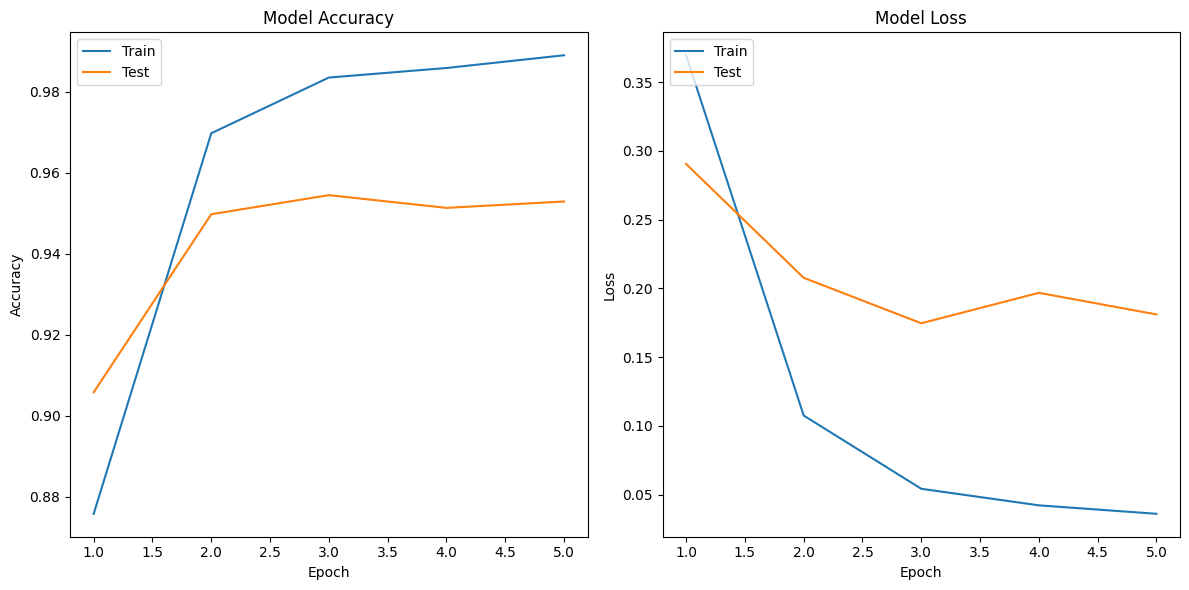

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Define the MobileNet model with pre-trained weights
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(Name), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 5 epochs
epochs = 5

history = model.fit(
    X_train_processed,  # Use preprocessed training data
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test_processed, y_test),  # Use preprocessed test data
    verbose=1
)

# Evaluate the model
y_pred = model.predict(X_test_processed)

# Convert one-hot encoded labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

recall = recall_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

f1score = f1_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

# Calculate overall accuracy
overall_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)

print(f"Overall Precision: {precision}, Recall: {recall}, F1-Score: {f1score}, Overall Accuracy: {overall_accuracy}")

# Calculate and print class-wise metrics
report = classification_report(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    target_names=Name,
    labels=np.arange(len(Name)),
    output_dict=True
)

for gem_class in Name:
    precision = report[gem_class]['precision']
    recall = report[gem_class]['recall']
    f1 = report[gem_class]['f1-score']
    print(f"Class: {gem_class}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Generate plots of accuracy and loss with each epoch
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


16705208/16705208 [==============================] - 2s 0us/step
Epoch 1/5
80/80 [==============================] - 287s 3s/step - loss: 0.8429 - accuracy: 0.7768 - val_loss: 0.1419 - val_accuracy: 0.9608
Epoch 2/5
80/80 [==============================] - 236s 3s/step - loss: 0.1443 - accuracy: 0.9595 - val_loss: 0.1215 - val_accuracy: 0.9702
Epoch 3/5
80/80 [==============================] - 278s 3s/step - loss: 0.0702 - accuracy: 0.9776 - val_loss: 0.0938 - val_accuracy: 0.9812
Epoch 4/5
80/80 [==============================] - 274s 3s/step - loss: 0.0754 - accuracy: 0.9811 - val_loss: 0.1535 - val_accuracy: 0.9623
Epoch 5/5
20/20 [==============================] - 46s 2s/step
Overall Precision: 0.9717623953001511, Recall: 0.9701726844583988, F1-Score: 0.970234915226172, Overall Accuracy: 0.9701726844583988
Class: Ruby, Precision: 1.0, Recall: 1.0, F1-Score: 1.0
Class: Blue Sapphire, Precision: 0.9886363636363636, Recall: 0.90625, F1-Score: 0.9456521739130435
Class: Yellow Sapphire, 

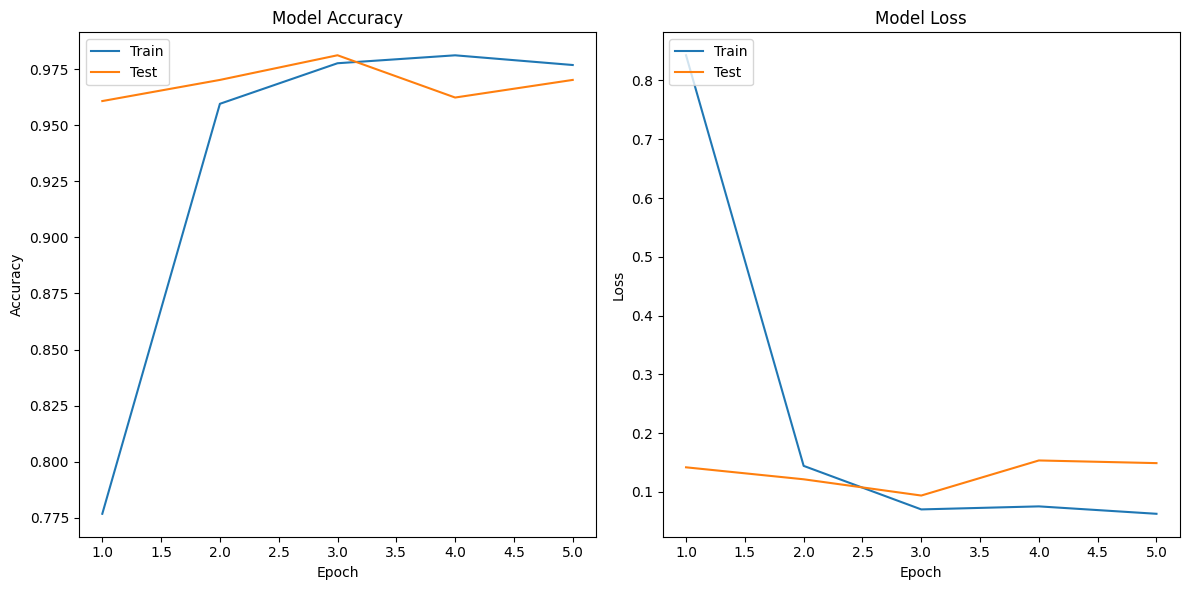

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Create the base model (EfficientNet) with pre-trained weights
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(len(Name), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Change the number of epochs as needed
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

recall = recall_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

f1score = f1_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

# Calculate overall accuracy
overall_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)

print(f"Overall Precision: {precision}, Recall: {recall}, F1-Score: {f1score}, Overall Accuracy: {overall_accuracy}")

# Calculate and print class-wise metrics
report = classification_report(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    target_names=Name,
    labels=np.arange(len(Name)),
    output_dict=True
)

for gem_class in Name:
    precision = report[gem_class]['precision']
    recall = report[gem_class]['recall']
    f1 = report[gem_class]['f1-score']
    print(f"Class: {gem_class}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Generate plots of accuracy and loss with each epoch
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Epoch 1/5
80/80 [==============================] - 1851s 23s/step - loss: 2.7060 - accuracy: 0.7367 - val_loss: 0.3849 - val_accuracy: 0.9152
Epoch 2/5
80/80 [==============================] - 1829s 23s/step - loss: 0.2448 - accuracy: 0.9246 - val_loss: 0.1569 - val_accuracy: 0.9702
Epoch 3/5
80/80 [==============================] - 1838s 23s/step - loss: 0.1443 - accuracy: 0.9615 - val_loss: 0.1568 - val_accuracy: 0.9576
Epoch 4/5
80/80 [==============================] - 1859s 23s/step - loss: 0.1055 - accuracy: 0.9690 - val_loss: 0.1819 - val_accuracy: 0.9655
Epoch 5/5
20/20 [==============================] - 369s 18s/step
Overall Precision: 0.9769294201032843, Recall: 0.9764521193092621, F1-Score: 0.9764443899399347, Overall Accuracy: 0.9764521193092621
Class: Ruby, Precision: 0.9764705882352941, Recall: 1.0, F1-Score: 0.988095238095238
Class: Blue Sapphire, Precision: 1.0, Recall: 0.9411764705882353, F1-Score: 0.9696969696969697
Class: Yellow Sapphire, Precision: 0.9550561797752809

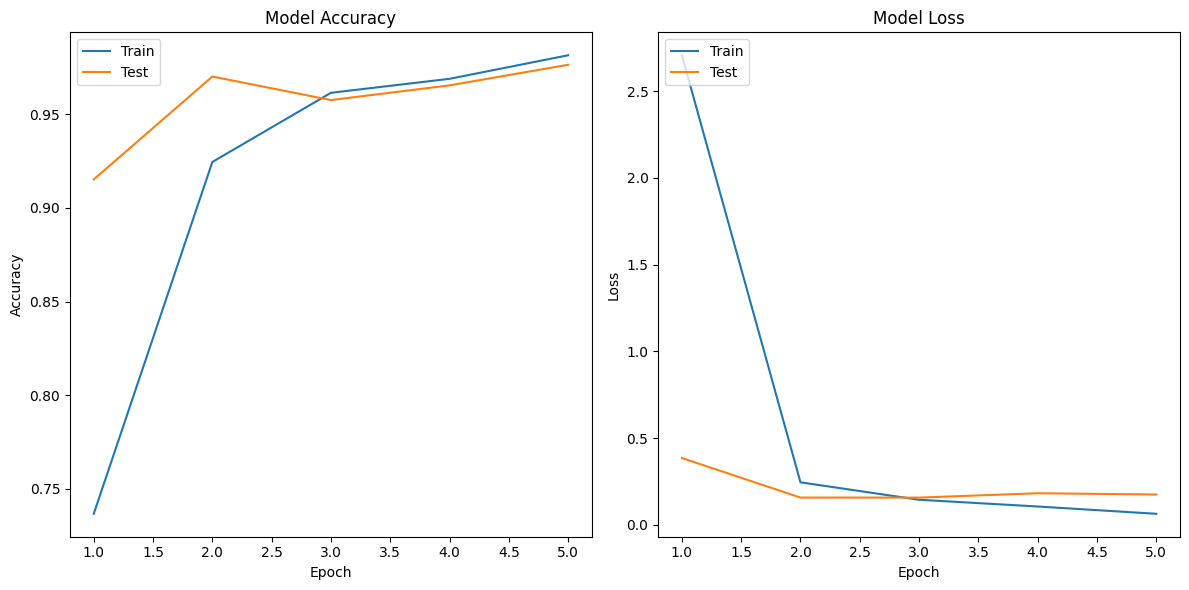

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Create the base model (VGG16) with pre-trained weights
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = Conv2D(128, (3, 3), activation='relu')(base_model.output)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(len(Name), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=5,  # Change the number of epochs as needed
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

recall = recall_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

f1score = f1_score(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    average='weighted'
)

# Calculate overall accuracy
overall_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)

print(f"Overall Precision: {precision}, Recall: {recall}, F1-Score: {f1score}, Overall Accuracy: {overall_accuracy}")

# Calculate and print class-wise metrics
report = classification_report(
    np.argmax(y_test, axis=1),
    y_pred_labels,
    target_names=Name,
    labels=np.arange(len(Name)),
    output_dict=True
)

for gem_class in Name:
    precision = report[gem_class]['precision']
    recall = report[gem_class]['recall']
    f1 = report[gem_class]['f1-score']
    print(f"Class: {gem_class}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Generate plots of accuracy and loss with each epoch
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
